# 1. Importação e setup

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\joseb\AppData\Local\Temp\ipykernel_23468\3558511279.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
notebook_path = Path.cwd()
project_root = notebook_path.parent
sys.path.append(str(project_root))

In [4]:
# Importando classes de análise
from src.eda.temporal_analysis import TemporalAnalysis
from src.eda.spatial_analysis import SpatialAnalysis
from src.eda.severity_analysis import SeverityAnalysis
from src.eda.correlation_analysis import CorrelationAnalysis
from src.eda.visualization import AccidentVisualizer

In [5]:
def load_data():
  data_path = Path("../files/processed/datatran_merged.csv")
  return pd.read_csv(data_path, sep=";")

In [6]:
df = load_data()
visualizer = AccidentVisualizer()

#### Analise temporal

In [7]:
temporal = TemporalAnalysis(df)

#### Acidentes por ano

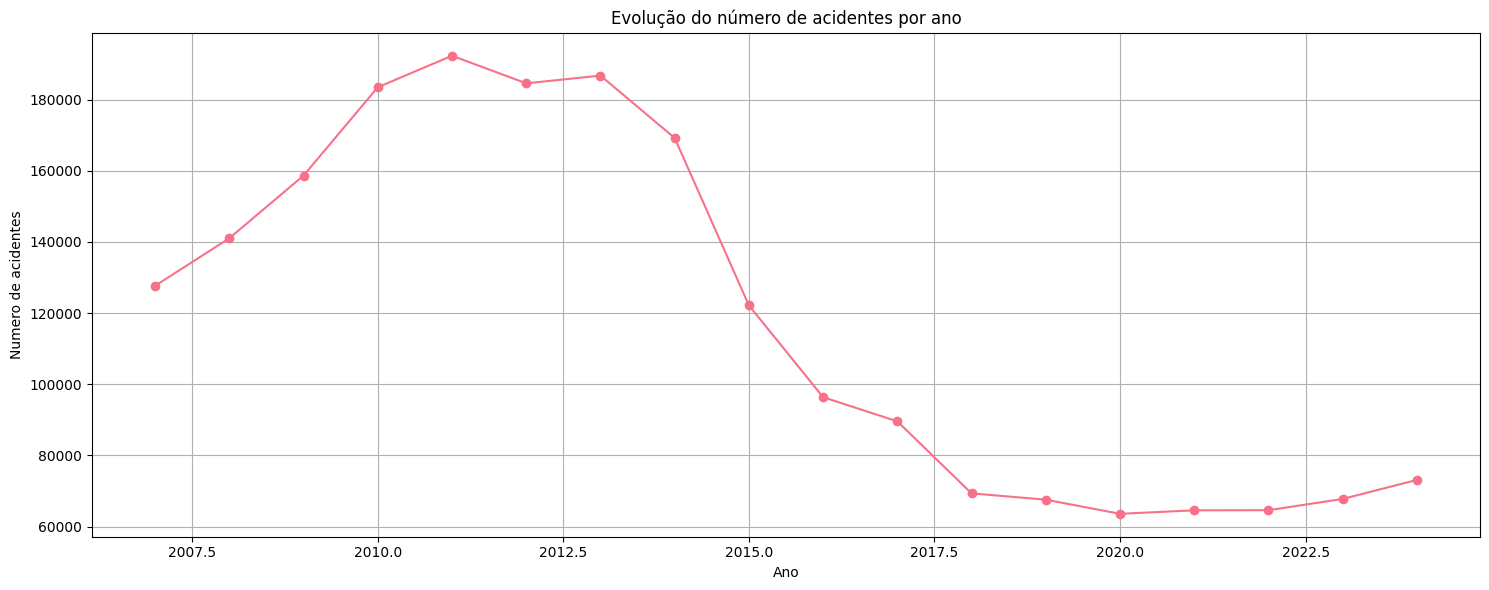

In [8]:
estatisticas_anuais = temporal.get_yearly_stats()
visualizer.plot_time_series(
  estatisticas_anuais['id'],
  'Evolução do número de acidentes por ano',
  'Ano',
  'Numero de acidentes'
)

#### Análise Espacial

In [10]:

spatial = SpatialAnalysis(df)

#### Estados com mais acidentes

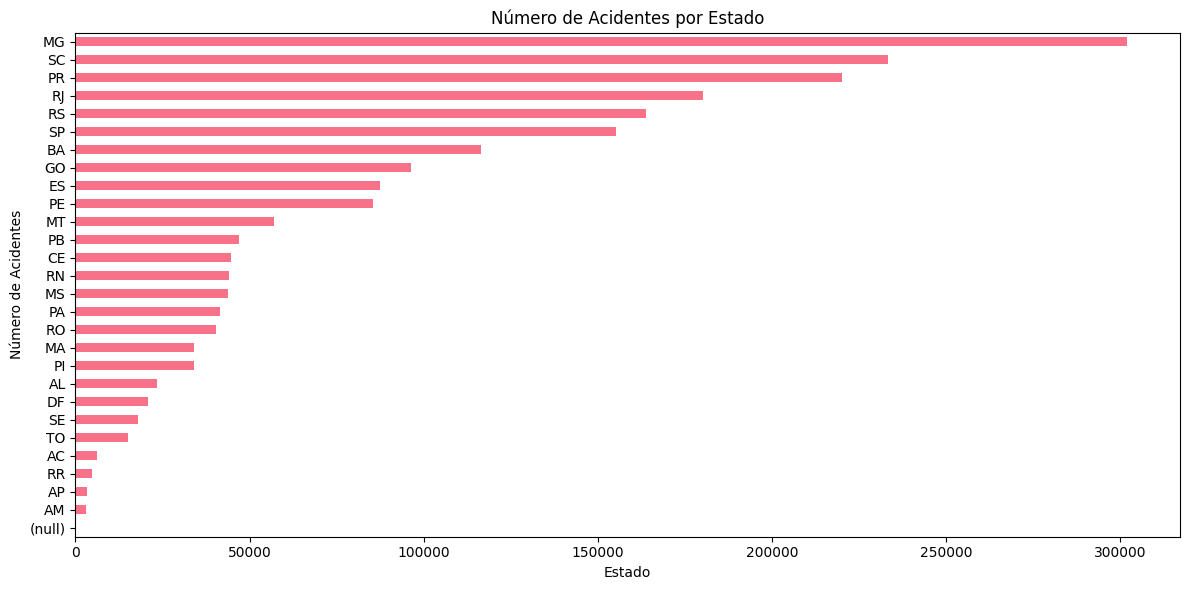

In [11]:
state_stats = spatial.get_state_stats()
visualizer.plot_bar_chart(
    state_stats[('id', 'count')].sort_values(ascending=True),
    'Número de Acidentes por Estado',
    'Estado',
    'Número de Acidentes',
    horizontal=True
)

#### Rodovias com mais acidentes

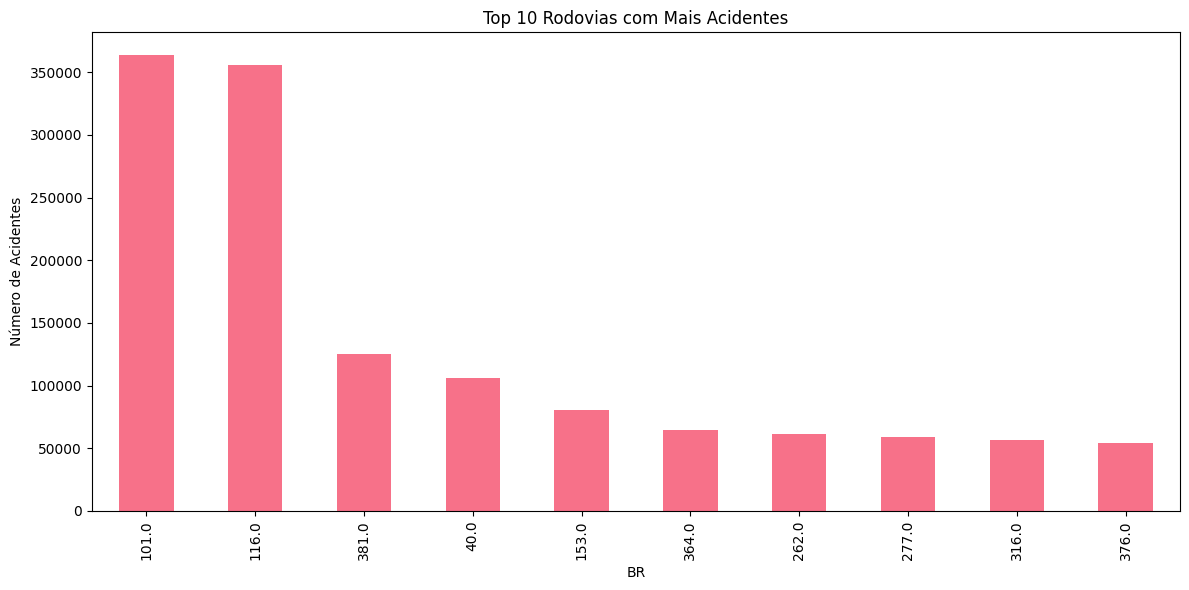

In [13]:
highway_stats = spatial.get_highway_stats()
visualizer.plot_bar_chart(
    highway_stats[('id', 'count')].head(10),
    'Top 10 Rodovias com Mais Acidentes',
    'BR',
    'Número de Acidentes'
)

#### Análise de Correlações

In [14]:
correlation = CorrelationAnalysis(df)

#### Corelação entre variaveis numericas

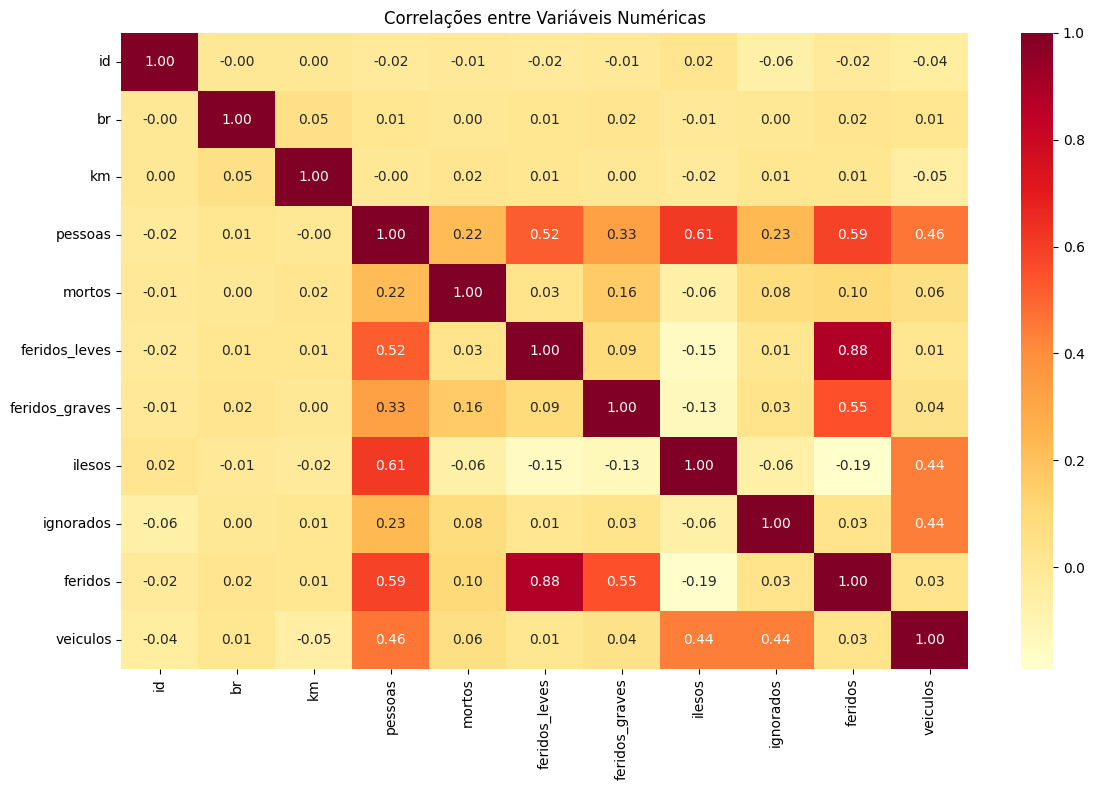

In [15]:
numeric_corr = correlation.get_numeric_correlations()
visualizer.plot_heatmap(
    numeric_corr,
    'Correlações entre Variáveis Numéricas'
)


#### Análises Específicas

#### Relação entre condições meteorológicas e severidade

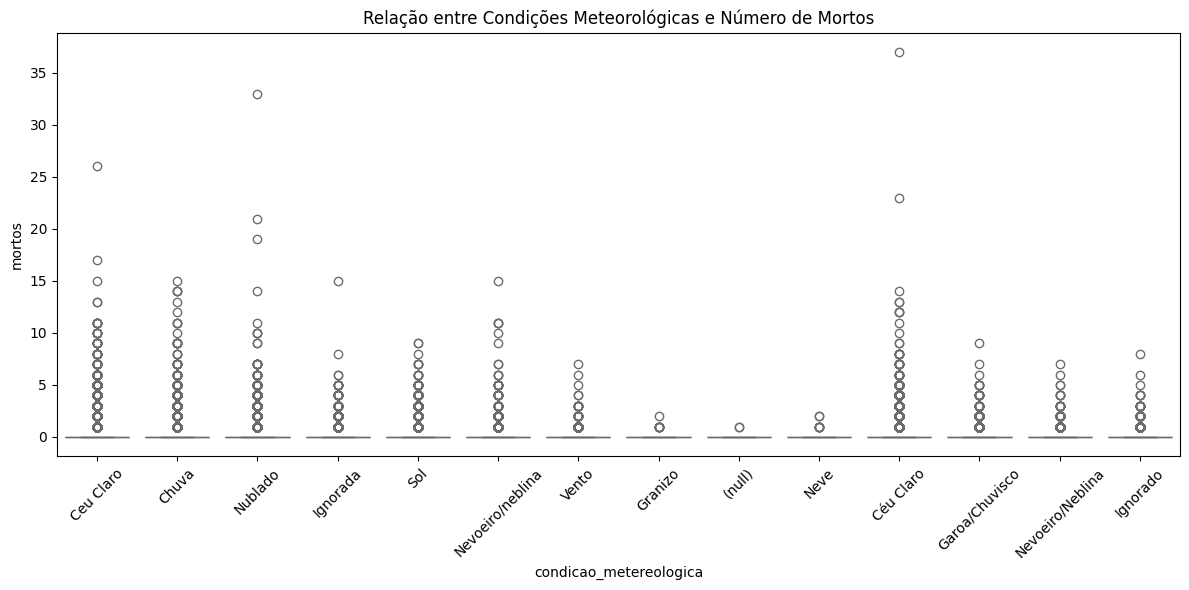

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condicao_metereologica', y='mortos')
plt.xticks(rotation=45)
plt.title('Relação entre Condições Meteorológicas e Número de Mortos')
plt.tight_layout()

#### Tipos de acidentes mais comuns por período do dia

<Figure size 1500x800 with 0 Axes>

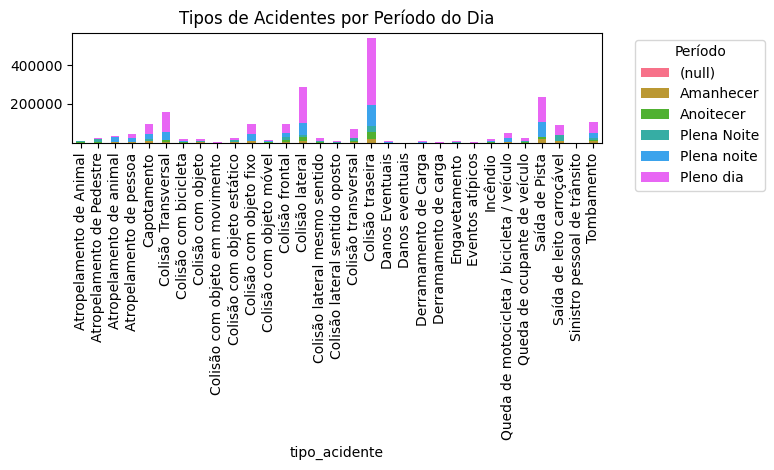

In [17]:
plt.figure(figsize=(15, 8))
pd.crosstab(df['tipo_acidente'], df['fase_dia']).plot(kind='bar', stacked=True)
plt.title('Tipos de Acidentes por Período do Dia')
plt.legend(title='Período', bbox_to_anchor=(1.05, 1))
plt.tight_layout()